## Biden individual contributions

This notebook is for the analysis of individual campaign contributions to Joe Biden. Data came from the Federal Election Commission, but filtered out and cleaned from another notebook.

In [1]:
import pandas as pd
import datetime
import numpy as np
import csv
import time
import re
from plotnine import *
pd.set_option('display.max_columns', None)

In [2]:
biden = pd.read_csv('filtered/biden individual contributions-Jan2024.csv')
biden

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6329/3557304599.py:1: DtypeWarning: Columns (10,16,18) have mixed types. Specify dtype option on import or set low_memory=False.


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513284987,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHANDLER, MARGUERITE",NEWTOWN,PA,189402418,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00792093,SA11AI_513300747,1720554.0,NaN,EARMARKED FOR VOTE BLUE MAJORITY (C00792093),4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHRISTIAN, LISA",DENVER,CO,80220,US DEPT OF AGRICULTURE,ATTORNEY,2023-01-01,99.0,C00010603,SA11AI_513288012,1720554.0,NaN,EARMARKED FOR DEMOCRATIC NATIONAL COMMITTEE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHUNG, EUGENE",SAN JOSE,CA,95120,ZT SYSTEMS,ENGINEER,2023-01-01,50.0,C00019331,SA11AI_513284844,1720554.0,NaN,EARMARKED FOR DEMOCRATIC PARTY OF WISCONSIN - ...,4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAMPAS, JO",ROUND ROCK,TX,786655648.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3638176,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
1759699,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAYLOR, BENJAMIN",HARTFORD,CT,61053805.0,COGNIZANT,COGNISANT BUSINESS ANALYST,2023-12-31,25.0,C00401224,3639965,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
1759700,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAYLOR, CHRISTOPHER",WEAVERVILLE,NC,287879273.0,ARVATO,CUSTOMER SERVICE REPRESENTATIVE,2023-12-31,25.0,C00401224,3624945,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
1759701,C00744946,N,YE,P,2.024013e+17,15E,IND,"BOIES, ROBIN",WELLS,NV,898359810.0,BOIES RANCH,RANCHER,2023-12-31,25.0,C00401224,3632697,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18


## Sort according to date of transaction

In [3]:
biden = biden.sort_values('transaction_date').reset_index(drop=True)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## Remove memo_code with 'X' and non-individuals

According to FEC guidelines, these donations should "not be included in the itemization total."

In [4]:
biden= biden[biden.memo_code != 'X']
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [5]:
biden.entity_type.value_counts()

IND    1759012
ORG         27
Name: entity_type, dtype: int64

In [6]:
biden= biden[biden.entity_type == 'IND']
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## Make into datetime

In [7]:
biden.transaction_date = pd.to_datetime(biden.transaction_date)
biden

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6329/646702678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## Fix zip code

The zip code format is 12345-1234. We need to put a dash there.

In [8]:
biden.zip = biden.zip.astype(str)
biden

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6329/187059664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [9]:
biden.zip = biden.zip.str.replace(r'[.]\d', '', regex=True)
biden

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6329/3269665907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,83340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,94086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,11225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,80239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [10]:
biden.zip = biden.zip.str.zfill(9)
biden

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6329/1905477409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,000083340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,000094086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,000011225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,000011225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,000080239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## How much individual contributions did Biden get? 

In [11]:
daily_amount = biden.resample('D', on='transaction_date').amount.sum()
daily_amount

transaction_date
2023-01-01     234386.0
2023-01-02     219917.0
2023-01-03     296146.0
2023-01-04     337269.0
2023-01-05     366328.0
                ...    
2023-12-27     234286.0
2023-12-28     276308.0
2023-12-29    1113868.0
2023-12-30     242172.0
2023-12-31     734281.0
Freq: D, Name: amount, Length: 365, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

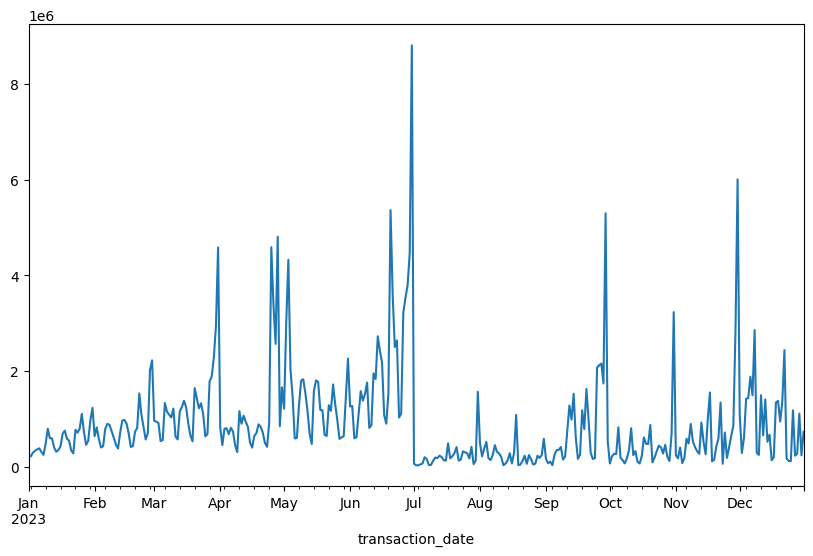

In [12]:
daily_amount.plot(figsize=(10,6))

## How many daily individual donors do Biden get?

Includes donors who donate in multiple days.

In [13]:
daily_donors = biden.groupby(['name', 'state', 'zip', 'transaction_date']).sum().reset_index()
daily_donors

,name,state,zip,transaction_date,image_no,amount,file_num,unique_row_id
0,"A ABRAMSON, BRIAN",TX,000077401,2023-05-19,2.023073e+17,6600.0,1720554.0,4.081020e+18
1,"A AITKEN, WYLIE",CA,000092707,2023-03-14,2.023073e+17,1200.0,1720554.0,4.081020e+18
2,"A AITKEN, WYLIE",CA,000092707,2023-06-30,8.092293e+17,5600.0,6882216.0,1.632408e+19
3,"A ANSON, CHERRILL",DC,000020008,2023-05-31,4.046146e+17,200.0,3441108.0,8.162040e+18
4,"A ARKUSH, DANIEL",FL,000033066,2023-01-03,2.023073e+17,15.0,1720554.0,4.081020e+18
...,...,...,...,...,...,...,...,...
1118948,"ZYVOLOSKI, DENNIS",WA,000098406,2023-05-04,2.023073e+17,15.0,1720554.0,4.081020e+18
1118949,"ZYVOLOSKI, DENNIS",WA,000098406,2023-05-21,2.023073e+17,50.0,1720554.0,4.081020e+18
1118950,"ZYVOLOSKI, DENNIS",WA,000098406,2023-06-06,2.023073e+17,35.0,1720554.0,4.081020e+18
1118951,"ZYVOLOSKI, DENNIS",WA,000098406,2023-06-30,2.023073e+17,50.0,1720554.0,4.081020e+18


In [14]:
donor_count = daily_donors.transaction_date.value_counts().to_frame().reset_index()
donor_count

,index,transaction_date
0,2023-06-30,16931
1,2023-02-28,16457
2,2023-04-30,12452
3,2023-03-31,11262
4,2023-01-31,10730
...,...,...
360,2023-07-09,146
361,2023-07-05,128
362,2023-07-02,125
363,2023-07-03,106


In [15]:
donor_count = donor_count.sort_values('index').reset_index(drop=True)
donor_count

,index,transaction_date
0,2023-01-01,3433
1,2023-01-02,3352
2,2023-01-03,3998
3,2023-01-04,4222
4,2023-01-05,4506
...,...,...
360,2023-12-27,1264
361,2023-12-28,1323
362,2023-12-29,1743
363,2023-12-30,1727


<AxesSubplot:xlabel='date'>

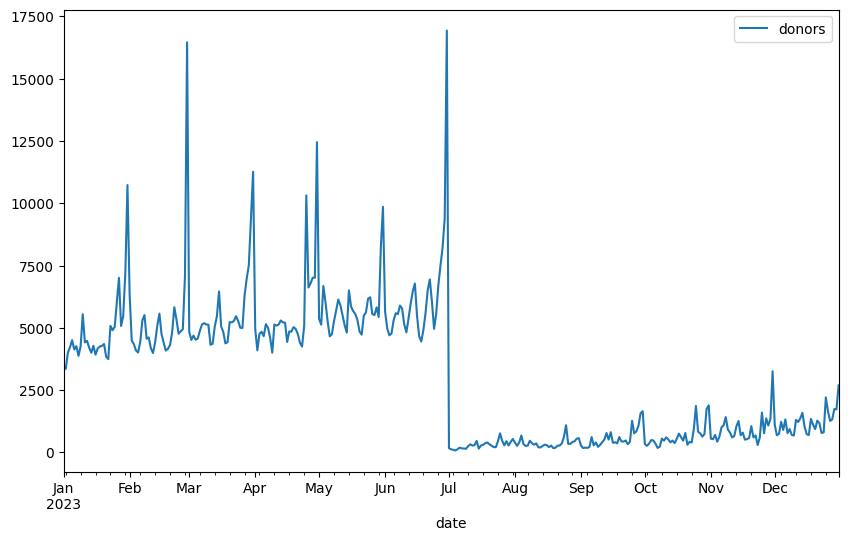

In [16]:
donor_count.columns= ['date', 'donors']
donor_count.plot(x='date', y='donors', figsize=(10,6))

## How many unique donors for Biden?

In [17]:
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00401224,N,MY,P,2.023073e+17,24T,IND,"CHESTON, FRANNY",KETCHUM,ID,000083340,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,15.0,C00573261,SA11AI_513283644,1720554.0,NaN,EARMARKED FOR END CITIZENS UNITED PAC (C00573261),4.081020e+18
1,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARMENTIER, KATHRYN",SUNNYVALE,CA,000094086,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,50.0,C00000935,SA11AI_513322619,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
2,C00401224,N,MY,P,2.023073e+17,15,IND,"PARRIS, FULVIA",BROOKLYN,NY,000011225,HRA,CIVIL WORKER,2023-01-01,1.0,NaN,SA11AI_513286521,1720554.0,NaN,CONTRIBUTION TO ACTBLUE,4.081020e+18
3,C00401224,N,MY,P,2.023073e+17,24T,IND,"PARRIS, FULVIA",BROOKLYN,NY,000011225,HRA,CIVIL WORKER,2023-01-01,15.0,C00745786,SA11AI_513286519,1720554.0,NaN,EARMARKED FOR DEMOCRATIC STRATEGY INSTITUTE (C...,4.081020e+18
4,C00401224,N,MY,P,2.023073e+17,24T,IND,"OGUNWO, BANKOLE",DENVER,CO,000080239,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,35.0,C00000935,SA11AI_513327800,1720554.0,NaN,EARMARKED FOR DCCC (C00000935),4.081020e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759698,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759699,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759700,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
1759701,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [20]:
unique_donors = biden.groupby(['name', 'state', 'zip']).nunique().count()
unique_donors

filer_id            219275
amendment_id        219275
report_type         219275
election_code       219275
image_no            219275
transaction_type    219275
entity_type         219275
city                219275
employer            219275
occupation          219275
transaction_date    219275
amount              219275
other_id            219275
transaction_id      219275
file_num            219275
memo_code           219275
memo_text           219275
unique_row_id       219275
dtype: int64

### Biden had 219,275 unique individual donors across different committees and ActBlue for entire 2023.